# Exploring The All Times Movies - Blockbuster Past & Future (Part 2)  

In this project we will predict the next successful movies.  
We will learn about different parameters of successful past films (such as genre, budget, language,total income and more)  



In this section we will deal with EDA , Data Cleaning and Machine Learning Alogorithm 

# Importing Libraries 

the next block will be responsible for installing and importing the necessary libraries and functions.

In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import time
import os # for testing use only
df=pd.read_csv('C:/file_name.csv')
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
prop_bud_inc = []  

In [2]:
df.shape

(1736, 30)

# Data Optimization

the next blocks will optimize some of the data by using functions we create  
editing_bud = A function that divides the amount by a million      
editing_prop =  Calculate ration budget-income  
editing_time = Divides movies running time into 4 categories  
editing_geners = split the geners (In some of the films there were several genres defined as one object)    

In [3]:
#we normalize to 1 M $ 

def editing_bud(series):
    if( (((isinstance(series,int))!= 1)) & (series != None) & (((isinstance(series,float))!= 1)) ) : 
        series = series.replace(',', '') 
        series = series.replace('$','')   
        series = series.replace('€','')  
        series = int(series) 
        series = series / 1000000
        series = (int(series))
        return int(series)  
    
df['Budget'] = df['Budget'].apply(editing_bud)
    
    
def normal_bud(series):  
    series = series / 1000000 
    return series  
    
df['Worldwide Income'] = df['Worldwide Income'].apply(normal_bud) 
df['International Income'] = df['International Income'].apply(normal_bud)  
df['Domestic Income'] = df['Domestic Income'].apply(normal_bud)      
df['Domistic Opening Value'] = df['Domistic Opening Value'].apply(normal_bud)   

In [4]:
def editing_bud(series):
    if( (((isinstance(series,int))!= 1)) & (series != None) & (((isinstance(series,float))!= 1)) ) : 
        series = series.replace(',', '') 
        series = series.replace('$','')   
        series = series.replace('€','')  
        series = int(series) 
        series = series / 1000000
        series = (int(series))
        return int(series)  

In [5]:
# the func to calculate the relation between income to budget 
def editing_prop(ser1, ser2):
        return(ser2/ser1)

In [6]:
#applying the func to calculate the relation
df['Prop Budget to Total Income'] = editing_prop(df['Budget'], df['Worldwide Income'])

In [7]:
# there are many types of running time strings, we want to divide the running times to groups 
# here is the devide code, we chose to do this inside the running time colum itself 
#the groups 
sub0 = "0 hr"
sub1 = "1 hr"
sub2 = "2 hr"
sub3 = "3 hr"
sub3 = "3 hr" 
sub4 = "4 hr" 
group0 = "0-1"
group1 = "1-2"
group2 = "2-3"
group3 = "3-4"
group4 = "4+"
group = "No Data"
def editing_time(series):  
    if(series): 
        series = str(series)
    else:
        return group
        
    if sub0 in series:
        return group0
    if sub1 in series:
        return group1
    if sub2 in series:
        return group2
    if sub3 in series:
        return group3
    if sub4 in series: 
        return group4
#the groups 
 

In [8]:
#the function that apply the deviation to time groups 
df['RunningTime'] = df['RunningTime'].apply(editing_time) 

In [9]:
#we want to divide the geners also, there are many options for combinations of geners groups 
#in order to show visualiztion properly, we will divide also to the main groups and main geners
#we chose the most common ones first for check 
#converting 
df = df.astype({' Generes' : str }) 

In [10]:
#the deviation func begin  
Gr = ['Action', 'Adventure', 'Sci-Fi', 'Comedy',
         'Crime', 'Romance', 'Family', 'Drama',  
         'Music', 'Animation', 'History', 'Mystery', 
         'War', 'Horror', 'Sport', 'Documentary', 'Thriller'
        ] 
gr0 = "Action, Adventure, Sci-Fi"
gr1 = "Action, Adventure, Fantasy"
gr2 = "Action, Adventure, Thriller"
gr3 = "Drama"
gr33 = "Action"
gr4 = "Comedy" 
gr3_4 = "Action, Drama"
gr5 = "Horror" 
gr6 = "War"
gr7 = "Animation" 
gr8 = "Short"
gr9 = "Sport"
gr10 = "Crime"
gr11 = "Documentary"
gr12 = "History" 
gr13 = "Music"
gr14 = "Romance"
gr15 = "Family"
gr16 = "Fantasy"
gr17 = "Mystery"
gr18 = "Documentary"
gr19 = "Thriller"
gr20 = "Adventure"
gr21 = "Sci-Fi"
gr22 = "Western"
gr23 = "Musical"
gr24 = "Biography"
grb = "Biography / Documentary"
gr = "other"
def editing_geners(res):
    if(gr0 == res):  
        return gr0 
    elif(gr1 == res):  
            return gr1 
    elif(gr2 == res):  
            return gr2 
    elif(gr3 == res):  
            return gr3  
    elif(gr4 == res):  
            return gr4 
    elif(gr3_4 in res):  
            return gr3_4 
    elif(gr33 == res):  
            return gr33 
    elif(gr5 in res):  #"Horror" 
            return gr5 
    elif(gr6 in res):  #"War"
            return gr6   
    elif(gr7 in res):  #"Animation" 
            return gr7 
    elif(gr8 in res):   #"Short" 
            return gr8  
    elif(gr9 in res):  #"Sport" 
            return gr9  
    elif(gr10 in res): #"Crime"
            return gr10 
    elif(gr11 in res or gr24 in res): # "Documentary"
            return grb 
    elif(gr12 in res): # " 
            return gr12 
    elif(gr13 in res or gr23 in res): #  
            return gr13 
    elif(gr14 in res): # " 
            return gr14 
    elif(gr15 in res): # " 
            return gr15 
    elif(gr16 in res): # " 
            return gr16 
    elif(gr17 in res): # " 
            return gr17     
    elif(gr18 in res): # "
            return gr18 
    elif(gr19 in res): # " 
            return gr19
    elif(gr21 in res): # " 
            return gr21 
    elif(gr20 in res): # " 
            return gr20 
    elif(gr22 in res): # " 
            return gr22 
    else:
        return gr 
 #the deviation function ending

In [11]:
#applying the generes func 
df[' Generes'] = df[' Generes'] .apply(editing_geners) 
#applying the generes func 

# Data Visualizations

Our Data Visualizations split into two types,  
Regular tables like running time chart , mpaa rating (bar,pie,line tables),    
and scatter plot like bugdet-worldwide income 

### Movie Running Time Table 

We split running time into 4 categories:
0-1 hr , 1-2 hr , 2-3 hr, 3-4 hr

Text(0, 0.5, '')

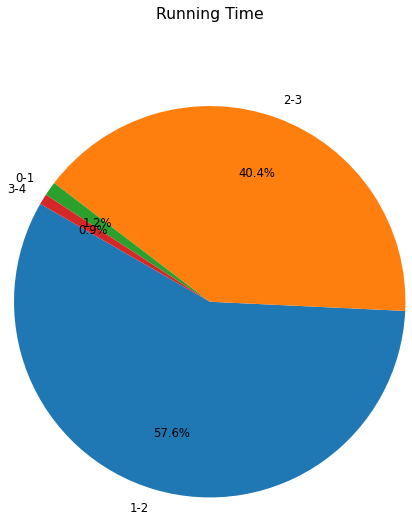

In [66]:
#running time
fig, axes = plt.subplots(figsize=(3, 3))
df["RunningTime"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=150, fontsize=11.7, pctdistance=0.7, radius = 3)
plt.title('',size=15)
plt.title('Running Time', x=0.5, y=2.2, fontsize=15.7)
plt.xlabel("")
plt.ylabel("") 


###  Generes Table

The table show us all geners and how many precent each gener takes from all geners

Text(0, 0.5, '')

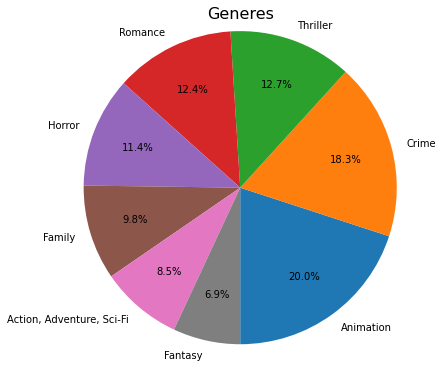

In [67]:
fig, axes = plt.subplots(figsize=(6, 6))
df[' Generes'].value_counts().loc[lambda x:x>3][:8].plot(kind = 'pie', autopct='%1.1f%%', startangle=270, fontsize=10, pctdistance=0.7, radius = 1.2)
plt.title('Generes',size=16)
plt.ylabel("")


# the 7 most popular movie geners in our dataset

### MPAA Rating Table

*The Motion Picture Association film rating system is used in the United States*

*and its territories to rate a motion picture's suitability for certain audiences based on its content.*

**G –** General Audiences

**PG –** Parental Guidance Suggested 

**PG-13 –** Parents Strongly Cautioned

**R –** Restricted 

**NC-17 –** Adults Only 

**Here is the known MPAA ratings:**

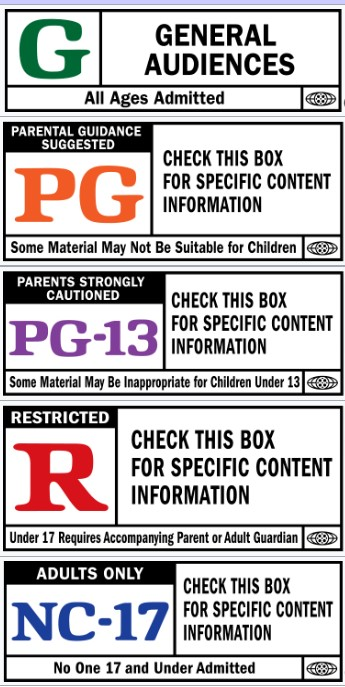

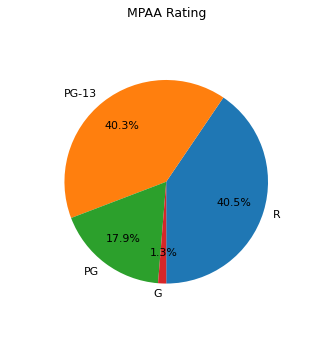

In [65]:
#mpaa rating pie table
fig, axes = plt.subplots(figsize=(5.7, 6))
df["MPAA Rating"].value_counts().loc[lambda x:x>2][:5].plot(kind = 'pie', autopct='%1.1f%%', startangle=270, fontsize=11, pctdistance=0.7, radius = 0.8)
plt.title('MPAA Rating',size=12.5)
plt.ylabel("")
plt.show() 


### Domestic Distributor Table

That table show all Domestic Distributors that have more then 10 movies in our data set 

we can see that the most popular ones are: **Warner Bros, Wolt Disney Motion Picture & 20th century fox** 

Text(0.5, 1.0, 'Domestic Distributor')

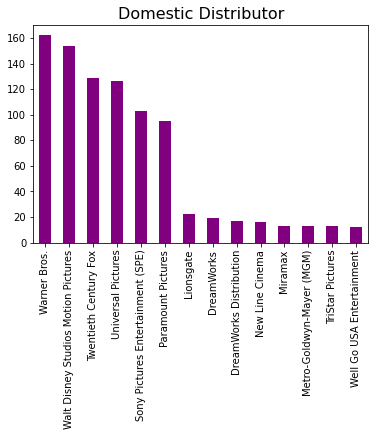

In [15]:
#DomesticDistributor table - the company that distributes the movie 
df['DomesticDistributor'].value_counts().loc[lambda x:x>10].plot(kind='bar',color='purple')
plt.title('Domestic Distributor',size=16)  

### Language Table

Line table that show all languages of the movies, 

English is definitely the most popular language. 

Text(0.5, 1.0, 'Movie Language')

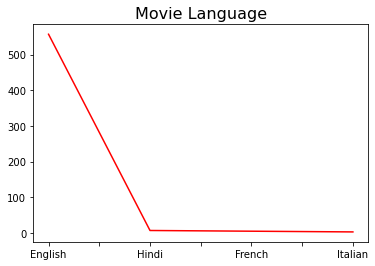

In [16]:
#language Table
df['Language'].value_counts().loc[lambda x:x>1].plot(kind='line',color='red')
plt.title('Movie Language',size=16)

### Director Movie Table

Show us all director that show in more then 2 movies

Text(0.5, 1.0, 'Movie Director')

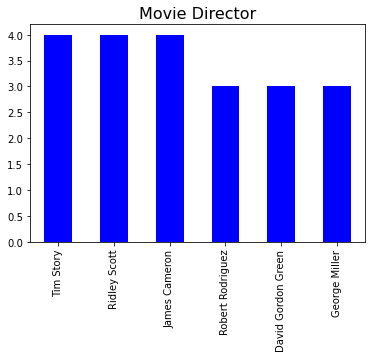

In [17]:
#director chart
df['Director'].value_counts().loc[lambda x:x>2].plot(kind='bar',color='blue')
plt.title('Movie Director',size=16)

### Country Origin

Show us country origin of movies (if the country origin is shown more the 2 times)

Text(0.5, 1.0, 'Country Origin of Movie ')

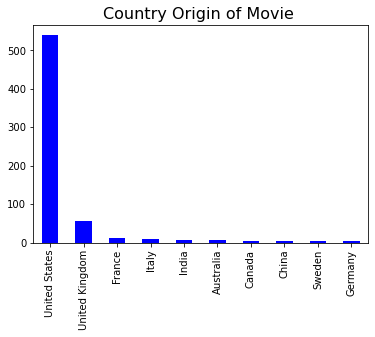

In [18]:
#country origin table
df['Country Origin'].value_counts().loc[lambda x:x>2].plot(kind='bar',color='blue')
plt.title('Country Origin of Movie ',size=16)

### Movie Location

Shows all the places where 2 films or more were shot 

Text(0.5, 1.0, 'Movie Location')

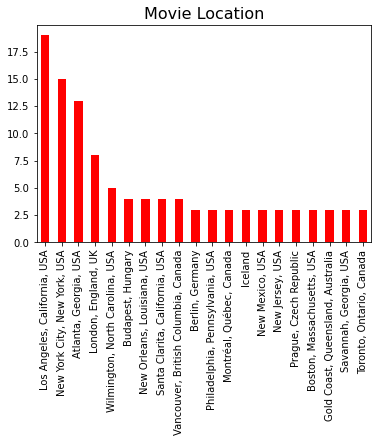

In [19]:
#location table
df['Location'].value_counts().loc[lambda x:x>2].plot(kind='bar',color='red')
plt.title('Movie Location',size=16)

### Main Actor Table

The next 2 block are actor and second actor table (All the actors who appeared in 2 films or more)

Text(0.5, 1.0, 'Movie Main Star')

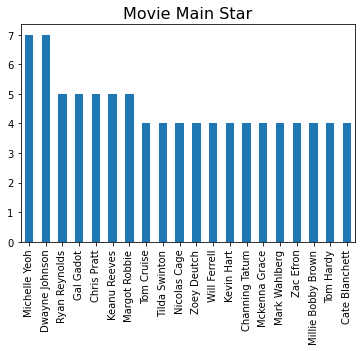

In [20]:
#star table
df['Stars'].value_counts().loc[lambda x:x>3].plot(kind='bar')
plt.title('Movie Main Star',size=16)

Text(0.5, 1.0, 'Movie Second Main Star')

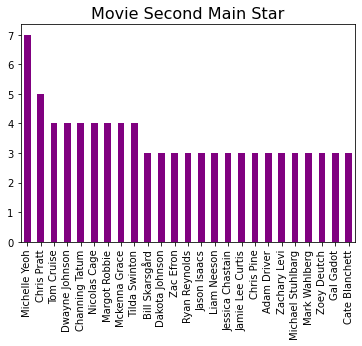

In [21]:
#second star table
df['Second Star'].value_counts().loc[lambda x:x>2].plot(kind='bar',color='purple')
plt.title('Movie Second Main Star',size=16)

### Movies Status Table

All movies status - each status per movie (Brodcasted, post-production and more), 
we were surprised to know the amount of ty

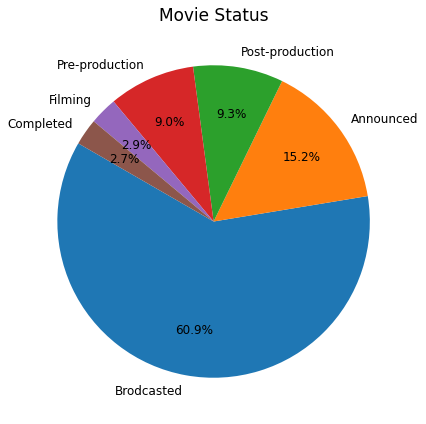

In [22]:
#movie status table 
fig, axes = plt.subplots(figsize=(7, 10))
df["Movie Status"].value_counts()[:6].plot(kind = 'pie', autopct='%1.1f%%', startangle=150, fontsize=12, pctdistance=0.7, radius = 1.0)
plt.title('Movie Status',size=17)
plt.ylabel("")
plt.show()

### Scatter Plot Graphs - Movies Dataset 

We have 7 differnt scatter plot of X-Y scatter plots:  

**1 - Worldwide Income as func of International Income**

**2 - Worldwide Income as func of Domestic Income**

**3 - Worldwide Income as func of Budget**

**4 - International Income as func of Budget**

**5 - Domestic Income as func of Budget** 

**6 - Domesic Income Percent as func of Budget** 

**7 - International Income Percent as func of Budget** 

Text(0, 0.5, 'Worldwide Income')

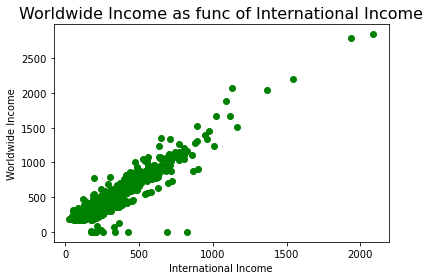

In [23]:
# International Income vs worldwide income
plt.title('Worldwide Income as func of International Income',fontsize=16)
plt.scatter(df['International Income'], df['Worldwide Income'] ,color='green')
plt.xlabel('International Income', fontsize = 10)
plt.ylabel('Worldwide Income', fontsize = 10)

**We found the first liniar relation as you can see above**

Text(0, 0.5, 'Worldwide Income')

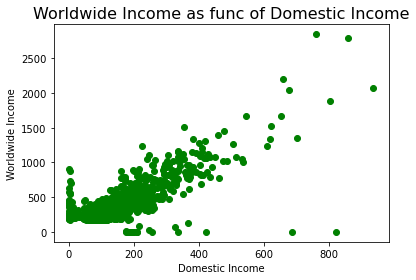

In [24]:
# International Income vs worldwide income
plt.title('Worldwide Income as func of Domestic Income',fontsize=16)
plt.scatter(df['Domestic Income'], df['Worldwide Income'] ,color='green')
plt.xlabel('Domestic Income', fontsize = 10)
plt.ylabel('Worldwide Income', fontsize = 10)

**We found the second liniar relation as you can see above**

**But this relation is less accurate in terms of linear accuracy**

### We wanted to observe a further distribution of data in the budget data,
###  in which we performed normalization and improvement



Text(0, 0.5, 'Worldwide Income')

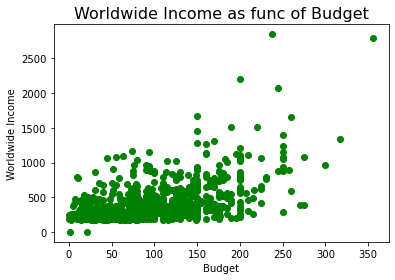

In [25]:
# budget vs worldwide income
plt.title('Worldwide Income as func of Budget',fontsize=16)
plt.scatter(df['Budget'],df['Worldwide Income'],color='green')
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('Worldwide Income', fontsize = 10)

Text(0, 0.5, 'International Income')

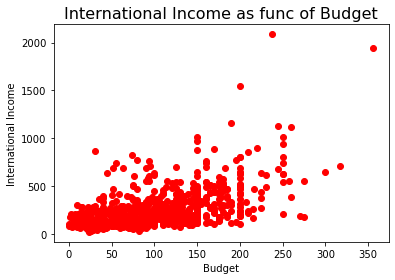

In [26]:
#buget vs international income table
plt.scatter(df['Budget'],df['International Income'],color='red')
plt.title('International Income as func of Budget',fontsize=16)
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('International Income', fontsize = 10)

Text(0, 0.5, 'Domestic Income')

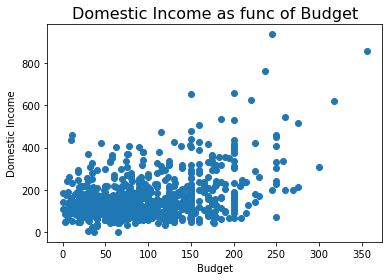

In [27]:
#budget vs domestic income table
plt.scatter(df['Budget'],df['Domestic Income'])
plt.title('Domestic Income as func of Budget',fontsize=16)
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('Domestic Income', fontsize = 10)

Relation cannot be more then 1.0 (percent of domestic income / all income) , 

We will delete this wrong data (rows deleting) 

In [28]:
df.drop(df[(df['Domesic Income Percent'] >1)].index, inplace=True)


In [29]:
df['Domesic Income Percent'].mean()

0.40007885861016185

Text(0, 0.5, 'Domesic Income Percent')

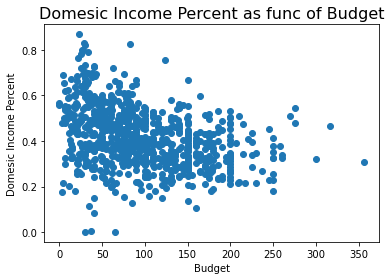

In [30]:
x=df['Budget']
y=df['Domesic Income Percent']
plt.scatter(x,y)
plt.title('Domesic Income Percent as func of Budget',fontsize=16) 
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('Domesic Income Percent', fontsize = 10)

Text(0, 0.5, 'International Income Percent')

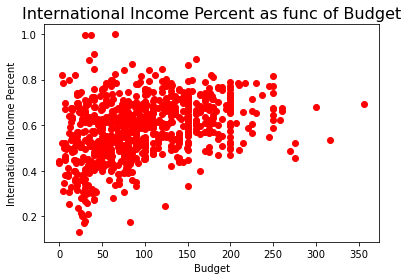

In [31]:
x=df['Budget']
y=df['International Income Percent']
plt.scatter(x,y,color='red')
plt.title('International Income Percent as func of Budget',fontsize=16)
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('International Income Percent', fontsize = 10)

In [32]:
df.describe(include='all') # getting some details about our columns

,Unnamed: 0,Rank,MPAA Rating,Name,Link,Generes,RunningTime,DomesticDistributor,Budget,Worldwide Income,...,Year,Stars,Country Origin,Production Company,Another Movie NAME,Movie Status,Sound Mix,Aspect Ratio,Second Star,Prop Budget to Total Income
count,1714.000000,1714,973,1712,1714,1714,1108,975,864.000000,978.000000,...,1297,528,661,669,348,1621,210,182,436,794.000000
unique,NaN,1714,5,1688,1714,25,4,47,NaN,NaN,...,62,363,22,1,348,8,1,1,330,NaN
top,NaN,1,PG-13,The Little Mermaid,https://www.boxofficemojo.com/title/tt0499549/...,Animation,1-2,Warner Bros.,NaN,NaN,...,2022,Michelle Yeoh,United States,"['Conde Nast Entertainment', 'Grand Electric',...",Phi Công Siêu Đẳng Maverick,Brodcasted,"['Dolby Atmos', 'Dolby Digital']",['2.39 : 1'],Michelle Yeoh,NaN
freq,NaN,1,463,3,1,210,658,161,NaN,NaN,...,208,7,539,669,1,978,210,182,7,NaN
mean,869.509918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.056713,409.730673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
std,503.190549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.622287,293.947307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,174.999005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.013783
25%,432.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,222.745529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.843079
50%,868.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,309.476486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.201523
75%,1306.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.500000,471.364197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.834152


In [33]:
# converting the years to num and creating the decades coloum  
df['Year']=pd.to_numeric(df['Year'], downcast='integer',errors='coerce')
df.fillna(method='pad',inplace=True)
df['Decade']=(df['Year']//10)*10
dfdec=df.groupby('Decade').mean()

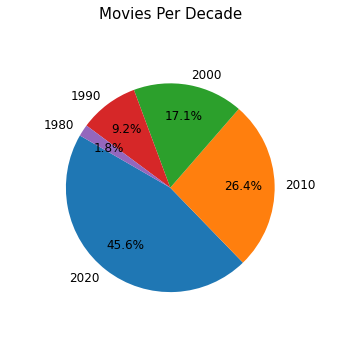

In [61]:
#Movies Decade pie table
fig, axes = plt.subplots(figsize=(6, 6))
df['Decade'].value_counts().loc[lambda x:x>2][:5].plot(kind = 'pie', autopct='%1.1f%%', startangle=150, fontsize=12, pctdistance=0.7, radius = 0.8)
plt.title('Movies Per Decade',size=15)
plt.ylabel("")
plt.show() 


In [35]:
df = df.astype({ 'Year' : int})
df = df.astype({ 'Decade' : int})
df = df.astype({ 'Movie Status' : str})


# Data Cleaning

To clean our data we have to clean all our columns that have at least 1000 Nan values.  
the function we used is dropna.

In [36]:
df.shape

(1714, 32)

In [37]:
df_clean=df.dropna(axis=1,thresh=1000)

In [38]:
df_clean.shape

(1714, 21)

# Machine Learning

In this section we will use Machine Learning algorithm.

## Linear Regression

Our goal of our ML algorithm is predicting the value of incomes of movies in Millions of Dollars.  
The Budgets were normalized to the amount in 1 M $. 
For this  -  we will be using Linear Regression.  

In [39]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 


In [40]:
df = df.astype({"Budget" : float})
df = df.astype({"Worldwide Income" : float})
df = df.astype({"International Income" : float})
df = df.astype({"Domestic Income" : float})
df = df.astype({"Domesic Income Percent" : float})
df = df.astype({"International Income Percent" : float})
df = df.astype({"Domistic Opening Value" : float})

In [41]:
df_copy_learn=df_clean[["Budget","Worldwide Income",
                   "Domestic Income","Domesic Income Percent",  
                   "International Income Percent","Domistic Opening Value","Year"]].copy()
df_copy_test = df_copy_learn.loc[1001:1714, : ]
df_copy_learn = df_copy_learn.loc[0:1000, : ]

In [42]:
# For that Kind of Machine Learning Algorithm we need to exclude the column that we wish to predict values for.
# In our case it is the "Final_Grade" column.
TRAINING_FEATURES = df_copy_learn.columns[df_copy_learn.columns != 'Worldwide Income']
TARGET_FEATURE = 'Worldwide Income'

x = df_copy_learn[TRAINING_FEATURES] #matrix X of all the features (Staff_Rating,Facilities_Rating.....)
y = df_copy_learn[TARGET_FEATURE] # vector y (label) shows only Final_Grade (Our prediction)

# The train test method is used to split our data in such way that most values are used to train the model
# and saves a small portion of the data to test what the model "learned"
# we will be using 75% of the data to train the model, and the test size will be 25% of the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) 
# ? 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(734, 6) (734,)
(245, 6) (245,)


In [43]:
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(x_train, y_train)
lrm_predictions = lrm.predict(x_test)

In [44]:
# lrm_predictions

In [45]:
print("Score: ", lrm_model.score(x_test, y_test))

Score:  0.9461591176108316


In [46]:
Preditions_VS_Actual = pd.DataFrame(x_test)
Preditions_VS_Actual['Actual_Income'] = y_test
Preditions_VS_Actual['Predicted_Income'] = lrm_predictions
Preditions_VS_Actual = Preditions_VS_Actual.reset_index()
Preditions_VS_Actual

,index,Budget,Domestic Income,Domesic Income Percent,International Income Percent,Domistic Opening Value,Year,Actual_Income,Predicted_Income
0,291,150.0,139.313948,0.325999,0.674001,48.475154,2003,427.344325,438.414015
1,136,55.0,330.455270,0.487235,0.512765,24.450602,1994,678.226133,786.669083
2,14,317.0,620.181382,0.465357,0.534643,220.009584,2017,1332.698830,1579.500051
3,476,85.0,148.974665,0.465960,0.534040,58.018348,2020,319.715683,333.558912
4,718,21.0,126.808165,0.556354,0.443646,17.253733,1993,227.927165,185.004503
...,...,...,...,...,...,...,...,...,...
240,330,275.0,213.767512,0.544042,0.455958,84.420489,2018,392.924807,472.202730
241,558,140.0,130.444603,0.456987,0.543013,34.048124,1998,285.444603,303.332145
242,47,125.0,303.030651,0.297956,0.702044,84.617303,2012,1017.030651,880.988006
243,168,217.0,130.168683,0.215004,0.784996,44.680073,2017,605.425157,530.792553


In [47]:
x_t = df_copy_test.columns[df_copy_test.columns != 'Worldwide Income']
z = df_copy_test[x_t] 

In [48]:
z

,Budget,Domestic Income,Domesic Income Percent,International Income Percent,Domistic Opening Value,Year
1001,45.0,101.599005,0.580569,0.419431,13.777943,2026
1002,45.0,101.599005,0.580569,0.419431,13.777943,2026
1003,45.0,101.599005,0.580569,0.419431,13.777943,2026
1004,45.0,101.599005,0.580569,0.419431,13.777943,2022
1005,45.0,101.599005,0.580569,0.419431,13.777943,2023
...,...,...,...,...,...,...
1710,2.0,101.599005,0.580569,0.419431,13.777943,2022
1711,2.0,101.599005,0.580569,0.419431,13.777943,2023
1712,2.0,101.599005,0.580569,0.419431,13.777943,2022
1713,2.0,101.599005,0.580569,0.419431,13.777943,2022


In [49]:
lrm_predictions_new = lrm.predict(z) 

In [50]:
lrm_predictions_new

array([117.27906442, 117.27906442, 117.27906442, 115.71494729,
       116.10597657, 116.10597657, 115.71494729, 118.06112299,
       116.10597657, 116.10597657, 115.71494729, 116.10597657,
       115.71494729, 115.71494729, 115.71494729, 115.71494729,
       115.71494729, 115.71494729, 115.71494729, 115.71494729,
       115.71494729, 115.71494729, 115.71494729, 115.71494729,
       115.71494729, 115.71494729, 115.71494729, 115.71494729,
       115.71494729, 117.27906442, 117.27906442, 116.10597657,
       116.10597657, 116.10597657, 116.10597657, 116.10597657,
       116.10597657, 115.71494729, 116.10597657, 116.10597657,
       116.10597657, 115.71494729, 115.71494729, 115.71494729,
       115.71494729, 116.10597657, 116.10597657, 115.71494729,
       115.71494729, 115.71494729, 115.71494729, 115.71494729,
       128.18570316, 128.18570316, 128.18570316, 128.18570316,
       123.65088284, 123.65088284, 123.65088284, 123.65088284,
       124.43294141, 128.96776173, 128.96776173, 128.96

In [51]:
df_copy_test['predicted'] = lrm_predictions_new

In [52]:
df['Name'].loc[1001:1714]


1001                                       Avatar 4
1002                                The Sinister Si
1003                                      Bad Boys 
1004                 Guillermo del Toro's Pinocchio
1005                                         Fast X
                           ...                     
1710                                 Black Site(I) 
1711                                   Cocaine Bear
1712                                    Matilda(I) 
1713                   Chip 'n Dale: Rescue Rangers
1714    The Guardians of the Galaxy Holiday Special
Name: Name, Length: 714, dtype: object

In [53]:
df_copy_test['predicted']  

1001    117.279064
1002    117.279064
1003    117.279064
1004    115.714947
1005    116.105977
           ...    
1710    105.965084
1711    106.356113
1712    105.965084
1713    105.965084
1714    105.965084
Name: predicted, Length: 714, dtype: float64

In [54]:
df_future = pd.DataFrame()


In [55]:
df_future['name'] = df['Name'].loc[1001:1714] 

In [56]:
df_future['name'] 

1001                                       Avatar 4
1002                                The Sinister Si
1003                                      Bad Boys 
1004                 Guillermo del Toro's Pinocchio
1005                                         Fast X
                           ...                     
1710                                 Black Site(I) 
1711                                   Cocaine Bear
1712                                    Matilda(I) 
1713                   Chip 'n Dale: Rescue Rangers
1714    The Guardians of the Galaxy Holiday Special
Name: name, Length: 714, dtype: object

In [57]:
df_future['Income Prediction']  = df_copy_test['predicted']  

In [58]:
df_future['Income Prediction']

1001    117.279064
1002    117.279064
1003    117.279064
1004    115.714947
1005    116.105977
           ...    
1710    105.965084
1711    106.356113
1712    105.965084
1713    105.965084
1714    105.965084
Name: Income Prediction, Length: 714, dtype: float64

In [59]:
df_future['Income Prediction'].describe()

count    714.000000
mean     118.557709
std       12.367558
min      104.956284
25%      108.912717
50%      115.714947
75%      122.517178
max      151.641863
Name: Income Prediction, dtype: float64

### We applied the ML Model Algorithm on the Future Movies DataSet 
### We predict this incomes in 1M dollars **$** per movie







In [60]:
df_future 

,name,Income Prediction
1001,Avatar 4,117.279064
1002,The Sinister Si,117.279064
1003,Bad Boys,117.279064
1004,Guillermo del Toro's Pinocchio,115.714947
1005,Fast X,116.105977
...,...,...
1710,Black Site(I),105.965084
1711,Cocaine Bear,106.356113
1712,Matilda(I),105.965084
1713,Chip 'n Dale: Rescue Rangers,105.965084
